# Jesus Plascencia 
### Purpose: To conduct Exploratory Data Analysis and hypothesize models

## Imports and Functions

In [3]:
import pandas as pd
import os
import missingno as msno
import janitor
import numpy as np
import plotly.express as px
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [16]:
# Useful Function, Ignore the two sells below
def variable_diagnostics(series, name=None):
    '''common sanity checks I constantly do. Created by ChatGPT'''
    return {
        'variable': name,
        'n_obs': series.shape[0],
        'n_nan': series.isna().sum(),
        'n_zero': (series == 0).sum(),
        'n_positive': (series > 0).sum(),
        'n_negative': (series < 0).sum(),
        'min': series.min(),
        'max': series.max(),
        'mean': series.mean()
    }

In [31]:
def plot_raw_and_log_hist(series, bins=1000, title_prefix=""):
    """
    Plot raw and log10(x+1) histograms using modern Matplotlib. Created by CHAT. 
    """
    x = series.dropna()

    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(13, 5),
        constrained_layout=True
    )

    # Raw distribution
    axes[0].hist(x, bins=bins)
    axes[0].set_title(f"Raw Distribution of {series.name}")
    axes[0].set_xlabel(series.name)
    axes[0].set_ylabel("Count")

    # Log-transformed distribution
    x_log = np.log10(x + 1)
    axes[1].hist(x_log, bins=bins)
    axes[1].set_title(f"Distribution of Banks by {(series.name).title()}")
    axes[1].set_xlabel(f"log({series.name} + 1)")
    axes[1].set_ylabel("Count")

    plt.show()

In [4]:
df = pd.read_csv(r"C:\Users\jesus\Desktop\data\df_EDA.csv")

In [8]:
df['end_date'] = pd.to_datetime(df['end_date'], yearfirst=True,errors = 'coerce')
df['closing_date_'] = pd.to_datetime(df['closing_date_'], yearfirst=True,errors = 'coerce')

In [9]:
df.dtypes

Unnamed: 0                                       int64
Reporting Period End Date                       object
FDIC Certificate Number                        float64
Last Date/Time Submission Updated On            object
total_assets                                   float64
equity                                         float64
net_interest_income                              int64
trading_revenue                                  int64
NPL_ratio                                      float64
early_delinquency_ratio                        float64
loansHTS_over_assets                           float64
ROA                                            float64
small_banks                                      int64
intermediate_small_banks                         int64
large_banks                                      int64
failed_banks                                     int64
inactive_banks                                   int64
NPL                                              int64
closing_da

In [5]:
df.head(10)

,Unnamed: 0,Reporting Period End Date,FDIC Certificate Number,Last Date/Time Submission Updated On,total_assets,equity,net_interest_income,trading_revenue,NPL_ratio,early_delinquency_ratio,loansHTS_over_assets,ROA,small_banks,intermediate_small_banks,large_banks,failed_banks,inactive_banks,NPL,closing_date_,end_date
0,0,2002-12-31,10057.0,2005-08-08T16:16:33,74327.0,12561.0,2922,0,NaN,NaN,NaN,0.011422,0,1,0,0,0,0,NaN,NaN
1,1,2002-12-31,3850.0,2005-08-08T16:16:33,25737.0,3856.0,1078,0,NaN,NaN,NaN,0.016358,0,1,0,0,0,0,NaN,NaN
2,2,2002-12-31,28868.0,2005-08-08T16:16:33,132091.0,17188.0,3204,0,NaN,NaN,NaN,0.007169,0,1,0,0,0,0,NaN,NaN
3,3,2002-12-31,14083.0,2005-08-08T16:16:33,8408.0,1248.0,382,0,NaN,NaN,NaN,0.007969,0,1,0,0,0,0,NaN,NaN
4,4,2002-12-31,16498.0,2005-08-08T16:16:33,150496.0,16944.0,6614,0,NaN,NaN,NaN,0.009628,0,1,0,0,1,0,NaN,2007-06-30
5,5,2002-12-31,10202.0,2005-08-08T16:16:33,23055.0,2256.0,883,0,NaN,NaN,NaN,0.015918,0,1,0,0,0,0,NaN,NaN
6,6,2002-12-31,6959.0,2005-08-08T16:16:33,263269.0,18496.0,10433,0,NaN,NaN,NaN,0.001937,0,1,0,0,0,0,NaN,NaN
7,7,2002-12-31,17562.0,2005-08-08T16:16:33,367904.0,29493.0,16828,0,0.0,0.0,0.166742,0.022941,0,1,0,0,1,0,NaN,2007-03-31
8,8,2002-12-31,17639.0,2005-08-08T16:16:33,130778.0,10189.0,5302,0,NaN,NaN,NaN,0.013053,0,1,0,0,0,0,NaN,NaN
9,9,2002-12-31,9392.0,2005-08-08T16:16:33,95109.0,13067.0,3653,0,NaN,NaN,NaN,0.015919,0,1,0,0,0,0,NaN,NaN


## Distributions of key variables

#### Bank size

Total assets is rightward skewed. After logging total assets we were able to visually see that the majority of banks in our sample are banks with 10e^6 assets.  This transformation normalizs our data making comparison across banks of different sizes possible. 

#### Equity

Equity alone is not very informative. It is extremely rightward skewed and needs to be converted to a ratio (equity ratio). The problem with using an equity ratio is that the output produces a very high ratio that should not be possible. 

#### Net interest margin 

NIM clearly slows distinctions between failed and non failed banks. Failed banks appear to have a higher density occuring at 0.02 and seem to have higher NIM values overall. This is noteable because failed banks seem to be dominating multiple portions of the NIM distribution.

#### Loans Held for sale

This is a balance sheet strategy that I found by reading related articles. The ratio of loans is supposed to show how liquid a banks asset composition is. What we can see is that only a few banks truly exhibit high liquidity (high LHFS ratio). When this happens we may be able to assume management is actively managing funds. Failed banks have a heavier rightward tale suggesting that high reliance on loans may lead to distress or be a signal for financial distress

#### Early delinquency

My hope with this ratio was to identify underperforming banks based on their loan commitments. If less people were paying loans that should result in lower income and periodic distress. The histogram reveals that I need to be careful with the treatment of early delinquency ratios.

### Total Assets

In [25]:
variable_diagnostics(df['total_assets'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(0),
 'n_zero': np.int64(2),
 'n_positive': np.int64(591112),
 'n_negative': np.int64(0),
 'min': 0.0,
 'max': 3476711000.0,
 'mean': np.float64(2194616.9965319717)}

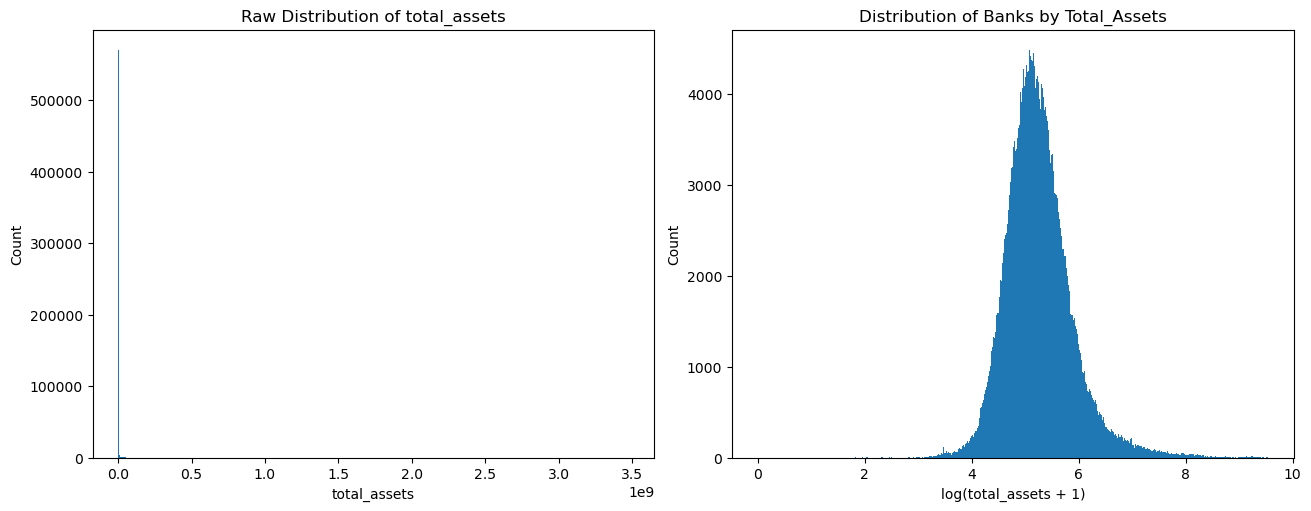

In [32]:
plot_raw_and_log_hist(df['total_assets'], bins=1000, title_prefix="Distribution of ")


In [ ]:
df['log_total_assets'] = np.log(df['total_assets'] +1)

### Equity

In [35]:
variable_diagnostics(df['equity']) #logging equity may be tricky because there are negative values reported

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(0),
 'n_zero': np.int64(4),
 'n_positive': np.int64(590832),
 'n_negative': np.int64(278),
 'min': -161976.0,
 'max': 317802000.0,
 'mean': np.float64(231653.1828665875)}

Text(0, 0.5, 'frequency')

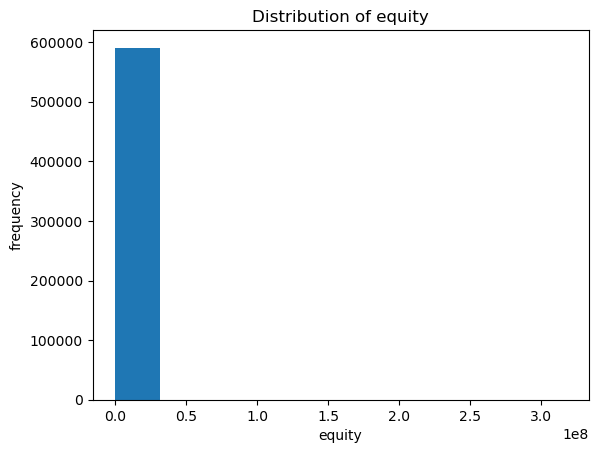

In [44]:
plt.hist(df['equity'], bins = 10) #Heavy Right skew
plt.title('Distribution of equity')
plt.xlabel('equity')
plt.ylabel('frequency')

### Net interest Income is simply too skewed for us to visualize. The problem stems from the fact that we cannot log negative values so we will use a ratio called net interest margin to attack this skewness

In [47]:
variable_diagnostics(df['net_interest_income'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(0),
 'n_zero': np.int64(395),
 'n_positive': np.int64(590261),
 'n_negative': np.int64(458),
 'min': -272000,
 'max': 93321000,
 'mean': np.float64(38994.41436169673)}

Text(0, 0.5, 'frequency')

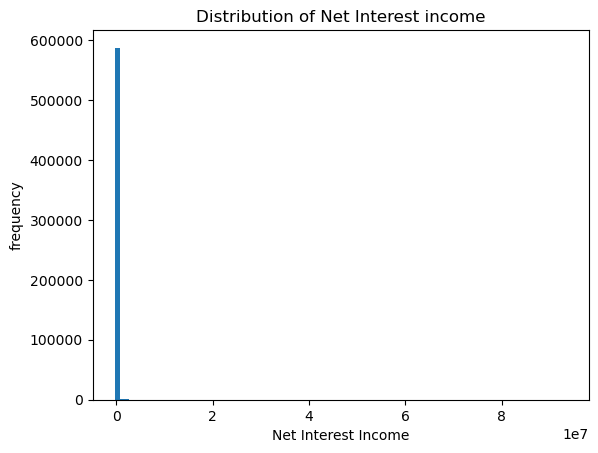

In [82]:
plt.hist(df['net_interest_income'], bins = 100) #Heavy Right skew
plt.title('Distribution of Net Interest income')
plt.xlabel('Net Interest Income')
plt.ylabel('frequency')

In [207]:
mask = df['total_assets'] > 0
df.loc[mask, 'NIM'] = (df.loc[mask,'net_interest_income'] / df.loc[mask, 'total_assets'])

In [208]:
variable_diagnostics(df['NIM'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(2),
 'n_zero': np.int64(394),
 'n_positive': np.int64(590260),
 'n_negative': np.int64(458),
 'min': -1.140625,
 'max': 7.599033816425121,
 'mean': np.float64(0.021438647887405054)}

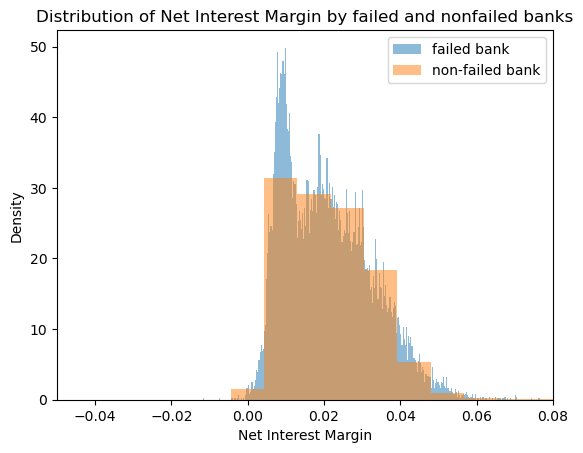

In [103]:
failed = df.loc[df['failed_banks'] == 1, 'NIM']
still_good = df.loc[df['failed_banks'] == 0, 'NIM']

plt.hist(failed, bins = 1000,density =True, alpha = 0.5, label = "failed bank")
plt.hist(still_good, bins = 1000,density =True, alpha = 0.5, label = "non-failed bank")


plt.xlim(-0.05,0.08)
plt.title('Distribution of Net Interest Margin by failed and nonfailed banks')
plt.xlabel('Net Interest Margin')
plt.ylabel('Density')
plt.legend()


Text(0, 0.5, 'frequency')

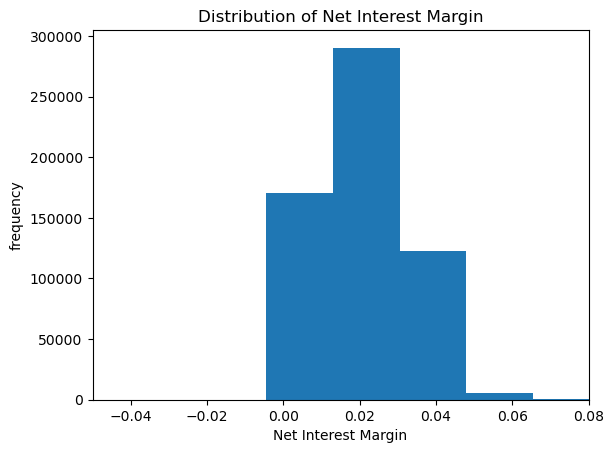

In [88]:
plt.hist(df['NIM'], bins = 500) #Heavy Right skew
plt.xlim(-0.05,0.08)
plt.title('Distribution of Net Interest Margin')
plt.xlabel('Net Interest Margin')
plt.ylabel('frequency')

### Trading / Assets --> A measure of market risk

This variable is not useful for EDA because there does not appear to be significant trading exposure amongst banks. In our histogram we see that trading revenue / total assets collapses into one bar line making the histogram uninformative.

In [134]:
variable_diagnostics(df['trading_revenue'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(0),
 'n_zero': np.int64(576121),
 'n_positive': np.int64(11894),
 'n_negative': np.int64(3099),
 'min': -4058000,
 'max': 26694000,
 'mean': np.float64(2368.7045020080727)}

In [135]:
mask2 = df['total_assets'] > 0
df.loc[mask2, 'trading_exposure'] = (df.loc[mask2,'trading_revenue'] / df.loc[mask2, 'total_assets'])

In [136]:
variable_diagnostics(df['trading_exposure'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(2),
 'n_zero': np.int64(576119),
 'n_positive': np.int64(11894),
 'n_negative': np.int64(3099),
 'min': -0.042370267318703046,
 'max': 2.8015905592611596,
 'mean': np.float64(4.21976216022024e-05)}

Text(0, 0.5, 'frequency')

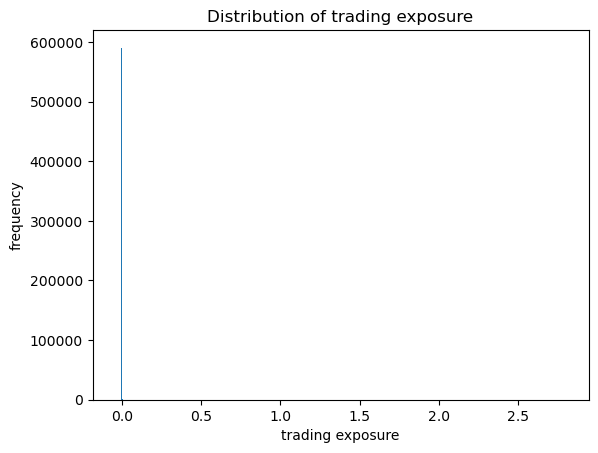

In [137]:
plt.hist(df['trading_exposure'], bins = 500) #Heavy Right skew
plt.title('Distribution of trading exposure')
plt.xlabel('trading exposure')
plt.ylabel('frequency')

### Non Performing Loans Ratio

variables added: 1) 'NPL_over_asset' 2)'NIM' 3) Remove 'trading_exposure'


In [127]:
variable_diagnostics(df['NPL_ratio']) # Cannot have infinity values.

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(435568),
 'n_zero': np.int64(151248),
 'n_positive': np.int64(4298),
 'n_negative': np.int64(0),
 'min': 0.0,
 'max': np.float64(inf),
 'mean': np.float64(inf)}

In [128]:
mask2 = df['total_assets'] > 0
df.loc[mask2, 'NPL_over_asset'] = (df.loc[mask2,'NPL'] / df.loc[mask2, 'total_assets'])

In [131]:
variable_diagnostics(df['NPL_over_asset']) #No longer have infinity

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(2),
 'n_zero': np.int64(586814),
 'n_positive': np.int64(4298),
 'n_negative': np.int64(0),
 'min': 0.0,
 'max': 1188.9125790355413,
 'mean': np.float64(0.02645205855715953)}

Text(0, 0.5, 'frequency')

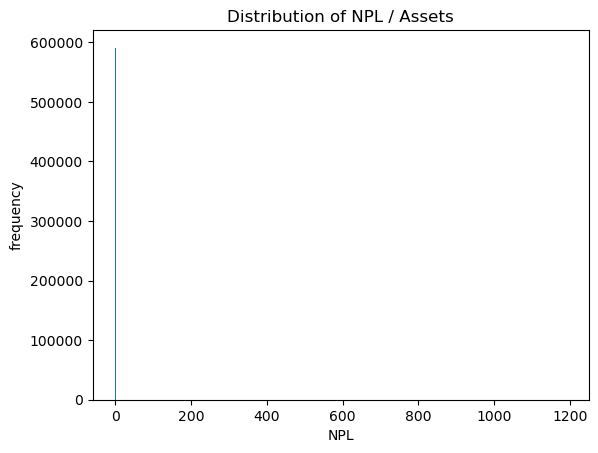

In [129]:
plt.hist(df['NPL_over_asset'], bins = 500) #Heavy Right skew
plt.title('Distribution of NPL / Assets')
plt.xlabel('NPL')
plt.ylabel('frequency')

Text(0, 0.5, 'Density')

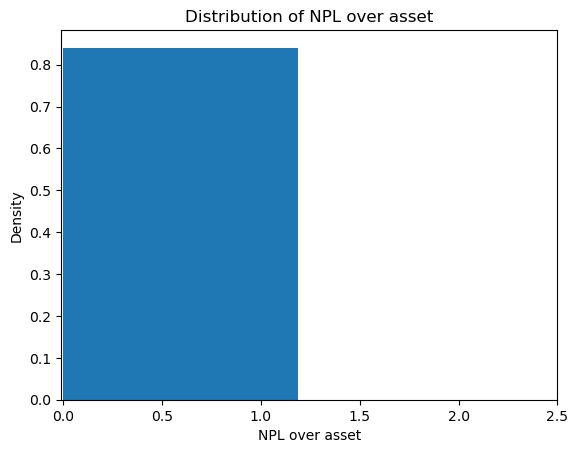

In [146]:
plt.hist(df['NPL_over_asset'], bins = 1000, density = True) #Heavy Right skew
plt.xlim(-0.01,2.5)
plt.title('Distribution of NPL over asset')
plt.xlabel('NPL over asset')
plt.ylabel('Density')

### Early Delinquency Ratio

In [147]:
variable_diagnostics(df['early_delinquency_ratio'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(436452),
 'n_zero': np.int64(151078),
 'n_positive': np.int64(3584),
 'n_negative': np.int64(0),
 'min': 0.0,
 'max': 739.3898305084746,
 'mean': np.float64(0.05198690725109189)}

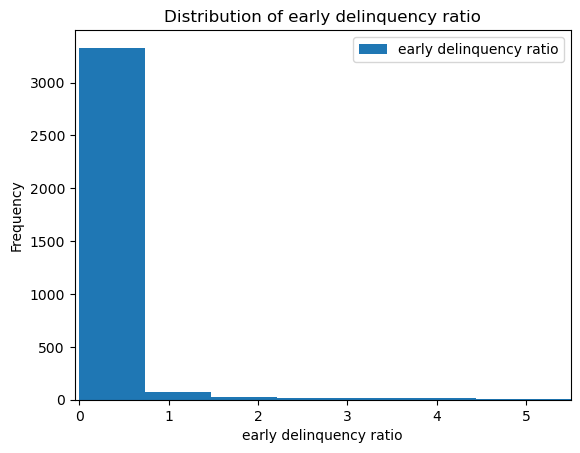

In [158]:
delinquency_ratio_positive = df.loc[df['early_delinquency_ratio'] > 0, 'early_delinquency_ratio']

plt.hist(delinquency_ratio_positive, bins = 1000, alpha = 1, label = "early delinquency ratio")
plt.xlim(-0.05,5.5)
plt.title('Distribution of early delinquency ratio')
plt.xlabel('early delinquency ratio')
plt.ylabel('Frequency')
plt.legend()

### ROA

In [159]:
variable_diagnostics(df['ROA'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(2),
 'n_zero': np.int64(397),
 'n_positive': np.int64(538088),
 'n_negative': np.int64(52627),
 'min': -50.8411214953271,
 'max': 21.719978459881528,
 'mean': np.float64(0.005964591937295235)}

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

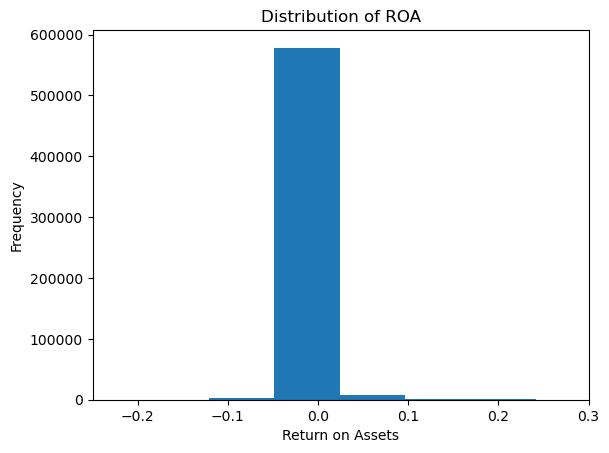

In [172]:
plt.hist(df['ROA'], bins = 1000, alpha = 1, label = "ROA")
plt.xlim(-0.25, 0.3)
plt.title('Distribution of ROA')
plt.xlabel('Return on Assets')
plt.ylabel('Frequency')
plt.legend

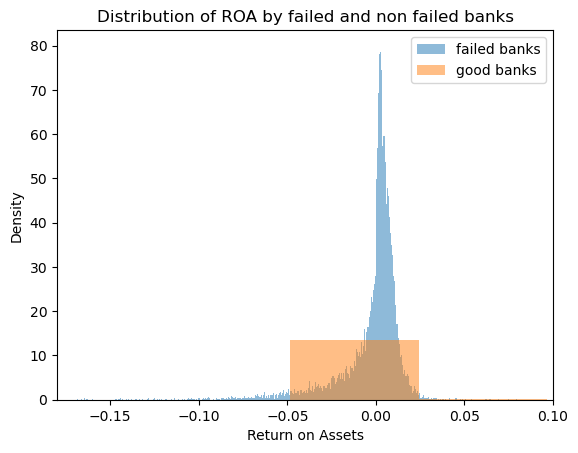

In [182]:
failed2 = df.loc[df['failed_banks'] == 1, 'ROA']
still_good2 = df.loc[df['failed_banks'] == 0, 'ROA']


plt.hist(failed2, bins = 1000, density = True, alpha = 0.5, label = "failed banks")
plt.hist(still_good2, bins = 1000, alpha = 0.5,density = True , label = "good banks")

plt.xlim(-0.18, 0.1)
plt.title('Distribution of ROA by failed and non failed banks')
plt.xlabel('Return on Assets')
plt.ylabel('Density')
plt.legend()

### Liquidity Measure

In [183]:
variable_diagnostics(df['loansHTS_over_assets'])

{'variable': None,
 'n_obs': 591114,
 'n_nan': np.int64(436452),
 'n_zero': np.int64(0),
 'n_positive': np.int64(154662),
 'n_negative': np.int64(0),
 'min': 1.5495880575107913e-07,
 'max': 0.979824082552652,
 'mean': np.float64(0.016606758835141847)}

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

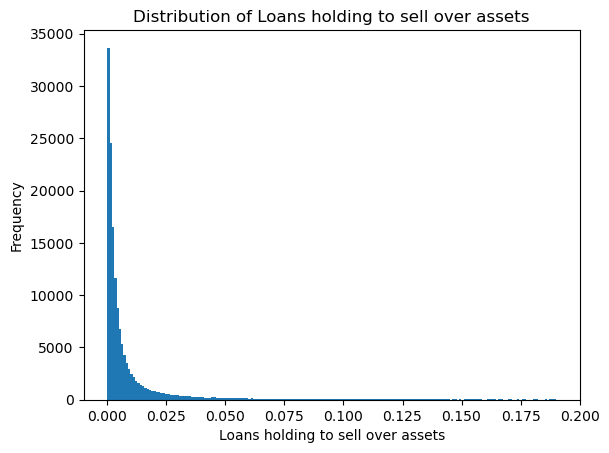

In [189]:
plt.hist(df['loansHTS_over_assets'], bins = 1000, alpha = 1, label = "Loans holding to sell over assets")
plt.xlim(-0.01, 0.2)
plt.title('Distribution of Loans holding to sell over assets')
plt.xlabel('Loans holding to sell over assets')
plt.ylabel('Frequency')
plt.legend

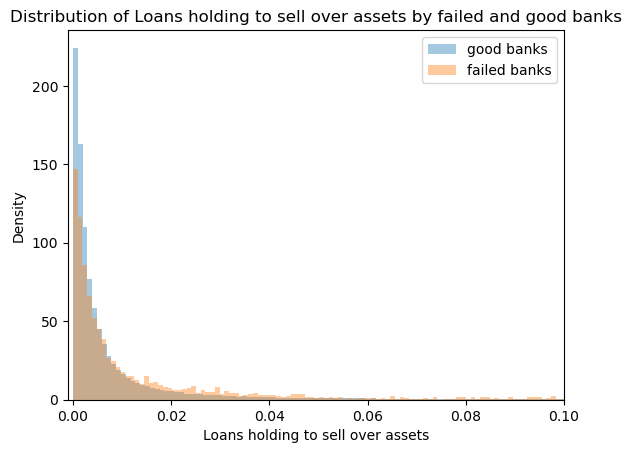

In [204]:
failed3 = df.loc[df['failed_banks'] == 1, 'loansHTS_over_assets']
still_good3 = df.loc[df['failed_banks'] == 0, 'loansHTS_over_assets']

plt.hist(still_good3, bins = 1000, alpha = 0.4, density = True, label = "good banks")
plt.hist(failed3, bins = 1000, alpha = 0.4, density = True, label = "failed banks")

plt.xlim(-0.001, 0.1)
plt.title('Distribution of Loans holding to sell over assets by failed and good banks')
plt.xlabel('Loans holding to sell over assets')
plt.ylabel('Density')
plt.legend()

## Finding Relationships between key features

Profitability relationships with failed bank is strong. ROA and NIM are very closely alligned. It seems as if failed banks cluster towards lower ROA and NIM values. Also, based on the log of total assets bank sizes do not seem to predict whether or not a bank is more likely to fail. This adds complexity to our question because bank failures occur at all scales. When looking at Loan s hold to sell over assets it seems like failed banks are near zero. This means that banks more prone to failure have lower asset quality. Loans is only of the primary ways a traditional bank gets revenue. NPL over assets did not give me the values I expected. It seems like this feature adds little to no value. Based on the pairplot, I should remove NPL over assets. 

In [225]:
x_col = ['log_total_assets', 'NPL_over_asset', 'loansHTS_over_assets', 'ROA', 'NIM']

y_col = ['failed_banks'] #dummy varible 1 if failed

In [227]:
# sample variables because pairplot takes to long
#I used help from chat to do this 

df_pair = (
    df[x_col + ['failed_banks']]
    .dropna()
    .sample(5000, random_state=42)
)


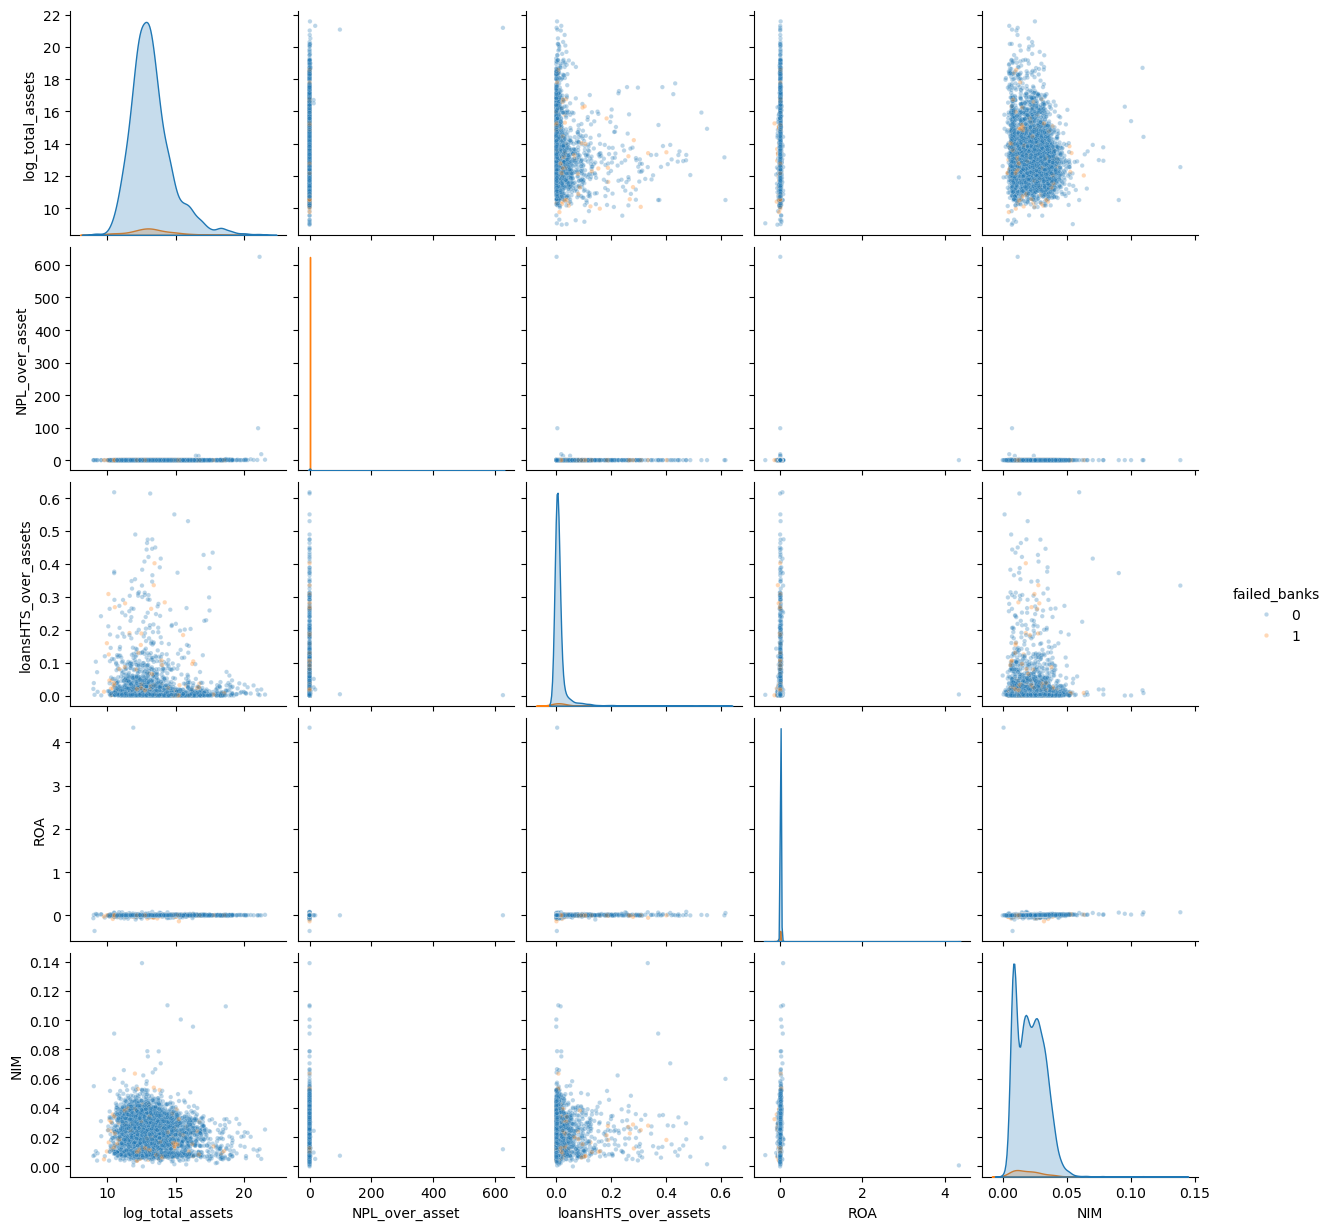

In [228]:
sns.pairplot(
    df_pair,
    vars=x_col,
    hue='failed_banks',
    plot_kws={'alpha': 0.3, 's': 10},
    diag_kind='kde'
)


## Correlations between variables

All correlations are relatively small. I also dont see linear relationships suggested by the correlations so I may have to use a model specifically for nonlinear data. Because these variables are not strongly correlated to one another I see no evidence of multicolinearity which is great. Log total asets correlates with everyting near zero. I found the key relationship between ROA and NIM interesting because ROA repersents return on asset whereas NIM represents Net interst margin. This negative relationship of -0.056 suggests that we have to double check for outliers in my data. I am unsure why this relationship is negative. Most economic identities I read indicate this should be positive. LoanHTS / Assets has a weak correlation with every variable. I included this variable because it represents a unique business operation specific banks choose to do. This ratio is conditional on a bank incurring the extra risk to sell their loans as opposed to holding to maturity. The fact that it is not very related to our varibales may offer a unique perspective. NPL over assets also has a weak correlation with other variables suggesting that it may not matter. It could also be the case that we did something incorrect in forming NPL over assets. 

In [240]:
corr_x = ['log_total_assets', 'loansHTS_over_assets', 'ROA', 'NIM', 'NPL_over_asset', 'early_delinquency_ratio']
corr_matrix = df[corr_x].corr()

Text(0.5, 1.0, 'Correlations')

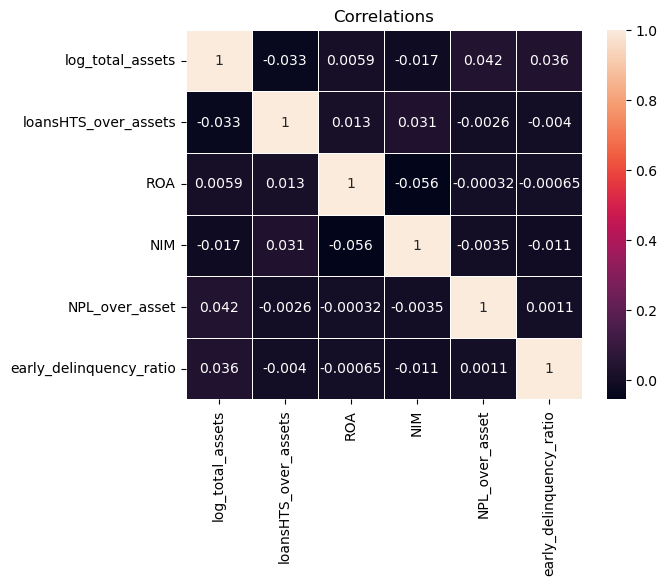

In [241]:

sns.heatmap(corr_matrix, annot = True, linewidth = .5, cmap = 'rocket')
plt.title('Correlations')

## Next Steps 

I have already started initial modeling. I am trying to produce a logistic or linear regression that closely follows CAMELS. I am also going to add lagged variables to account for macroeconomic fixed effectss, and a few other variables I find necessary for modeling.